<a href="https://colab.research.google.com/github/cutiepie25/AI/blob/main/Web_Scraping_Clustering_beautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Clustering de texto con TF-IDF capturando texto por Web scraping***

https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/

In [ ]:
#Cargamos librerías principales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Instalación de paquetes para tratamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

nltk.download('popular')
stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
#Web Scraping
import requests
from bs4 import BeautifulSoup

In [ ]:
#Se descarga el contenido de la página
url = 'https://www.elcolombiano.com'
r = requests.get(url) #Trae todo el contenido en tiempo real de la página web incluyendo texto HTML
html = r.content
html

b'    <!doctype html>  <html class="ltr" dir="ltr" lang="es-ES"> <head> <meta content="text/html; charset=UTF-8" http-equiv="content-type"> <title>El Colombiano | noticias de Medell\xc3\xadn, Antioquia, Colombia y el mundo.</title> <link rel="shortcut icon" href="https://estaticos.elcolombiano.com/base-portlet/webrsrc/ctxvar/7bacdb4bae8c4a41855e25ae67d07716.jpeg"> <style amp-custom> .mln_uppercase_mln\n\t\t{\n\t\t\ttext-transform:uppercase\n\t\t}\n\t\t\n\t\t.mln_small-caps_mln\n\t\t{\n\t\t\tfont-variant:small-caps\n\t\t}\n\t\t</style> <meta name="keywords" content="Noticias"> <meta name="keywords" content=" Medell\xc3\xadn"> <meta name="keywords" content=" Colombia"> <meta name="keywords" content=" multimedia"> <meta name="keywords" content=" \xc3\xbaltima hora"> <meta name="keywords" content=" actualidad"> <meta name="keywords" content=" internacional"> <meta name="keywords" content=" entretenimiento"> <meta name="keywords" content=" cultura"> <meta name="robots" content="index, follo

In [ ]:
#Se crea un objeto con el parser html para identificar etiquetas y texto
soup = BeautifulSoup(html, 'html.parser')
soup

 <!DOCTYPE html>
 <html class="ltr" dir="ltr" lang="es-ES"> <head> <meta content="text/html; charset=utf-8" http-equiv="content-type"/> <title>El Colombiano | noticias de Medellín, Antioquia, Colombia y el mundo.</title> <link href="https://estaticos.elcolombiano.com/base-portlet/webrsrc/ctxvar/7bacdb4bae8c4a41855e25ae67d07716.jpeg" rel="shortcut icon"/> <style amp-custom=""> .mln_uppercase_mln
		{
			text-transform:uppercase
		}
		
		.mln_small-caps_mln
		{
			font-variant:small-caps
		}
		</style> <meta content="Noticias" name="keywords"/> <meta content=" Medellín" name="keywords"/> <meta content=" Colombia" name="keywords"/> <meta content=" multimedia" name="keywords"/> <meta content=" última hora" name="keywords"/> <meta content=" actualidad" name="keywords"/> <meta content=" internacional" name="keywords"/> <meta content=" entretenimiento" name="keywords"/> <meta content=" cultura" name="keywords"/> <meta content="index, follow" name="robots"/> <meta content="Las principales notic

In [ ]:
#Se obtiene el texto (incluye caracteres especiales)
texto = soup.get_text()
texto

'     El Colombiano | noticias de Medellín, Antioquia, Colombia y el mundo.                                                                                <img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=378526515676058&amp;ev=PageView&amp;noscript=1">\n                                                            x               personMi Colombiano   graphic_eqPódcast   play_arrowVideos   photo_cameraReportajes gráficos   account_circleSuscríbete                               pico y placa \n            Pico y Placa Medellín \n                 Pico y Placa Medellín     viernes  1 y 5  1 y 5     pico y placa \n            Pico y Placa Medellín \n              Pico y Placa Medellín     jueves  4 y 8  4 y 8     pico y placa \n            Pico y Placa Medellín \n              Pico y Placa Medellín     miercoles  3 y 7  3 y 7     pico y placa \n            Pico y Placa Medellín \n              Pico y Placa Medellín     martes  6 y 9  6 y 9     pico y placa \n

In [ ]:
# Se busca el contenido con una etiqueta específica
contenido= soup.find_all(class_='priority-content') # Revisar código fuente HTML y buscar el nombre de la etiqueta
contenido

[<span class="priority-content" mlnid="idcon=46286952;order=2.0">Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años</span>,
 <span class="priority-content" mlnid="idcon=46286952;order=2.0">Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años</span>,
 <span class="priority-content" mlnid="idcon=46246688;order=2.0">Investigación a Petro y al presidente de Ecopetrol retrasa venta de bonos</span>,
 <span class="priority-content" mlnid="idcon=46237413;order=1.0">Ecopetrol mueve fichas para reacomodar sus finanzas</span>,
 <span class="priority-content" mlnid="idcon=46285996;order=2.0">Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia”</span>,
 <span class="priority-content" mlnid="idcon=46285996;order=2.0">Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia”</span>,
 <span class="priority-content" 

In [ ]:
# El resultado se convierte a un dataframe
matriz=[]
data = pd.DataFrame()

for row in contenido:
  matriz.append(row.text.strip())

data['noticias'] =matriz
data

,noticias
0,Se desploma la acción de Ecopetrol: llega a su...
1,Se desploma la acción de Ecopetrol: llega a su...
2,Investigación a Petro y al presidente de Ecope...
3,Ecopetrol mueve fichas para reacomodar sus fin...
4,"Polémica en el Congreso: este martes, día del ..."
...,...
203,"Medellín, la ciudad donde más se deterioró la ..."
204,Se acerca el Black Friday: cuándo es en Colomb...
205,Se acerca el Black Friday: cuándo es en Colomb...
206,"Cybertruck, uno de los más vendidos en el merc..."


# ***Converitir a minúscula, limpiar y tokenizar***

In [ ]:
texto=' '.join(data['noticias'])
texto

'Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años Investigación a Petro y al presidente de Ecopetrol retrasa venta de bonos Ecopetrol mueve fichas para reacomodar sus finanzas Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia” Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia” Fifa confirmó cambio de horario para partido de la Selección Colombia en condición de local por las Eliminatorias Fifa confirmó cambio de horario para partido de la Selección Colombia en condición de local por las Eliminatorias Misterio por moto encontrada dentro del río Medellín, a la altura del Puente Guayaquil Misterio por moto encontrada dentro del río Medellín, a la altura del Puente Guayaquil ¿El presidente Petro estuvo en Cartagena mientras el Gobierno lanza

In [ ]:
#Transformers
!pip install transformers
from transformers import pipeline

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
#Tokenizar el texto
from nltk.tokenize import word_tokenize
tokens= word_tokenize(texto)
tokens

['Se',
 'desploma',
 'la',
 'acción',
 'de',
 'Ecopetrol',
 ':',
 'llega',
 'a',
 'sus',
 'mínimos',
 'de',
 'los',
 'últimos',
 'dos',
 'años',
 'Se',
 'desploma',
 'la',
 'acción',
 'de',
 'Ecopetrol',
 ':',
 'llega',
 'a',
 'sus',
 'mínimos',
 'de',
 'los',
 'últimos',
 'dos',
 'años',
 'Investigación',
 'a',
 'Petro',
 'y',
 'al',
 'presidente',
 'de',
 'Ecopetrol',
 'retrasa',
 'venta',
 'de',
 'bonos',
 'Ecopetrol',
 'mueve',
 'fichas',
 'para',
 'reacomodar',
 'sus',
 'finanzas',
 'Polémica',
 'en',
 'el',
 'Congreso',
 ':',
 'este',
 'martes',
 ',',
 'día',
 'del',
 'partido',
 'de',
 'la',
 'Selección',
 'Colombia',
 ',',
 'Cámara',
 'no',
 'sesionó',
 'por',
 '“',
 'día',
 'de',
 'la',
 'familia',
 '”',
 'Polémica',
 'en',
 'el',
 'Congreso',
 ':',
 'este',
 'martes',
 ',',
 'día',
 'del',
 'partido',
 'de',
 'la',
 'Selección',
 'Colombia',
 ',',
 'Cámara',
 'no',
 'sesionó',
 'por',
 '“',
 'día',
 'de',
 'la',
 'familia',
 '”',
 'Fifa',
 'confirmó',
 'cambio',
 'de',
 'hora

In [ ]:
# Lista de stopwords: palabras vacías (artículos,preposiciones y conjunciones)
from nltk.corpus import stopwords
sw= stopwords.words('spanish') #Se configuran stopwords en español
sw

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
#Función para limpieza de texto
import re
def limpiar_texto(texto):
  #1. Se convierte a minúscula
  texto=texto.lower()
  #2. Eliminar tildes
  replacements = (("á", "a"),("é", "e"),("í", "i"),("ó", "o"),("ú", "u"))
  for a, b in replacements:
      texto = texto.replace(a, b)
  # 3.Se eliminan dígitos y caracteres especiales
  pattern = r'[^a-z ]'
  texto = re.sub( pattern, '', texto )
  #4. Se tokeniza
  lista = word_tokenize(texto)
  #5. Se eliminan las stopwords
  clean_tokens = lista[:]
  for token in lista:
    if token in sw:
      clean_tokens.remove(token)
  return clean_tokens

In [ ]:
#Se llama la función de limpieza
tokens_clean=limpiar_texto(texto)
tokens_clean

['desploma',
 'accion',
 'ecopetrol',
 'llega',
 'minimos',
 'ultimos',
 'dos',
 'aos',
 'desploma',
 'accion',
 'ecopetrol',
 'llega',
 'minimos',
 'ultimos',
 'dos',
 'aos',
 'investigacion',
 'petro',
 'presidente',
 'ecopetrol',
 'retrasa',
 'venta',
 'bonos',
 'ecopetrol',
 'mueve',
 'fichas',
 'reacomodar',
 'finanzas',
 'polemica',
 'congreso',
 'martes',
 'dia',
 'partido',
 'seleccion',
 'colombia',
 'camara',
 'sesiono',
 'dia',
 'familia',
 'polemica',
 'congreso',
 'martes',
 'dia',
 'partido',
 'seleccion',
 'colombia',
 'camara',
 'sesiono',
 'dia',
 'familia',
 'fifa',
 'confirmo',
 'cambio',
 'horario',
 'partido',
 'seleccion',
 'colombia',
 'condicion',
 'local',
 'eliminatorias',
 'fifa',
 'confirmo',
 'cambio',
 'horario',
 'partido',
 'seleccion',
 'colombia',
 'condicion',
 'local',
 'eliminatorias',
 'misterio',
 'moto',
 'encontrada',
 'dentro',
 'rio',
 'medellin',
 'altura',
 'puente',
 'guayaquil',
 'misterio',
 'moto',
 'encontrada',
 'dentro',
 'rio',
 'med

In [ ]:
from transformers import pipeline

In [ ]:
#Clasificación
classifier = pipeline("zero-shot-classification")
classifier(texto, candidate_labels=["education", "politics","sports"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'sequence': 'Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años Se desploma la acción de Ecopetrol: llega a sus mínimos de los últimos dos años Investigación a Petro y al presidente de Ecopetrol retrasa venta de bonos Ecopetrol mueve fichas para reacomodar sus finanzas Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia” Polémica en el Congreso: este martes, día del partido de la Selección Colombia, Cámara no sesionó por “día de la familia” Fifa confirmó cambio de horario para partido de la Selección Colombia en condición de local por las Eliminatorias Fifa confirmó cambio de horario para partido de la Selección Colombia en condición de local por las Eliminatorias Misterio por moto encontrada dentro del río Medellín, a la altura del Puente Guayaquil Misterio por moto encontrada dentro del río Medellín, a la altura del Puente Guayaquil ¿El presidente Petro estuvo en Cartagena mientras el G

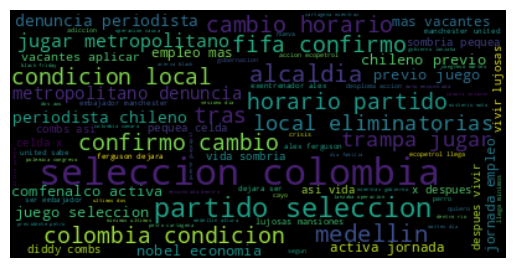

In [ ]:
#Nube de palabras
texto_wc= ' '.join(tokens_clean)
wc = WordCloud(background_color="black").generate(texto_wc)
wc.to_file("nube1.png")
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

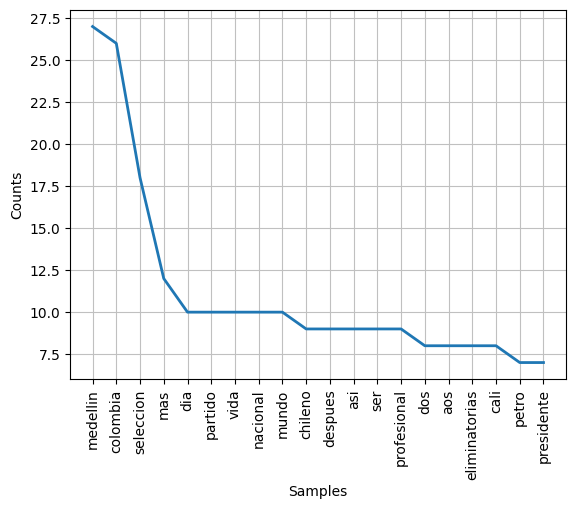

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Calcular frecuencia de aparición de todas las palabras
from nltk.probability import FreqDist
fdist = FreqDist(tokens_clean)
fdist.plot(20)